Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [4]:
def PerformModel(model, X, y):
    model.fit(X, y)
    w0 = model.intercept_
    wi = model.coef_
    predictions = model.predict(X)
    
    classificationPrediction = []
    for prediction in predictions:
        if prediction > 0.5:
            classificationPrediction.append(1)
        else:
            classificationPrediction.append(0)
    trainError = accuracy_score(classificationPrediction, y)
    trainError = str(trainError*100) + "% training accuracy"
    return w0, wi, predictions, classificationPrediction, trainError

def DrawLineOnInterval(w0, wi, interval):
    w = JoinCoef(w0, wi)
    XDraw = sp.linspace(interval[0], interval[1])
    yDraw = []
    for x in XDraw:
        yDraw.append((-1)*w[0]/float(w[2]) + (-1)*w[1]*x/float(w[2]))
    plt.plot(XDraw, yDraw, "r--")
    
def JoinCoef(w0, wi):
    try:
        w0 = np.array([w0])
        return np.concatenate((w0, wi))
    except:
        return np.concatenate((w0[0], wi[0]))
    

[ 2.1]
[[-0.5 -0.1]]
[1 1 1 1 0 0 0]
[1, 1, 1, 1, 0, 0, 0]
100.0% training accuracy


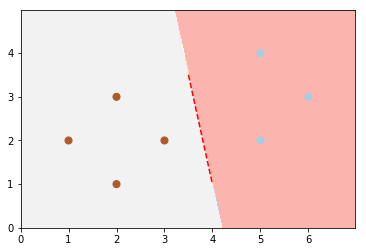

In [5]:
model = RidgeClassifier(alpha=0)
w0, wi, predictions, classificationPrediction, trainError = PerformModel(model, seven_X, seven_y)
print w0
print wi
print predictions
print classificationPrediction
print trainError

mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x : model.predict(x) >= 0.5)
DrawLineOnInterval(w0, wi, [3.5,4])

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

1.55
[-0.25 -0.05]
[ 1.   0.9  1.2  0.7  0.2  0.1 -0.1]
[1, 1, 1, 1, 0, 0, 0]
100.0% training accuracy


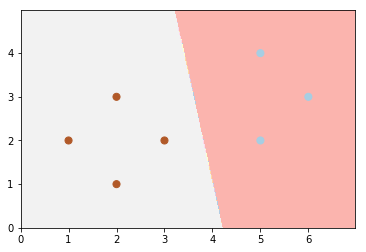

In [6]:
model = LinearRegression()
w0, wi, predictions, classificationPrediction, trainError = PerformModel(model, seven_X, seven_y)
print w0
print wi
print predictions
print classificationPrediction
print trainError

mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x : model.predict(x) >= 0.5)
#DrawLineOnInterval(w0, wi, [3.5,4]) #if the codomain was -1..1, then the line would be the same

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

0.92469352014
[-0.20140105  0.15411559]
[ 0.67600701  0.98423818  1.03152364  0.62872154  0.22591944  0.53415061
  0.17863398 -0.2591944 ]
[1, 1, 1, 1, 0, 1, 0, 0]
87.5% training accuracy


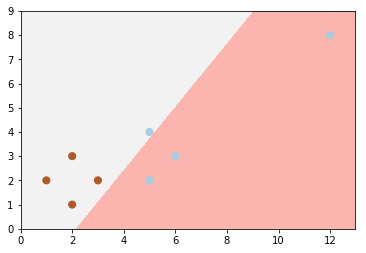

In [8]:
model = LinearRegression()
w0, wi, predictions, classificationPrediction, trainError = PerformModel(model, outlier_X, outlier_y)
print w0
print wi
print predictions
print classificationPrediction
print trainError

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x : model.predict(x) >= 0.5)
#DrawFunctionOnInterval(JoinCoef(w0, wi), [3.5,4])

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

1.25252525253
[-0.2020202  -0.04040404]
[ 0.80808081  0.72727273  0.96969697  0.56565657  0.16161616  0.08080808
 -0.08080808  0.76767677]
[1, 1, 1, 1, 0, 0, 0, 1]
87.5% training accuracy


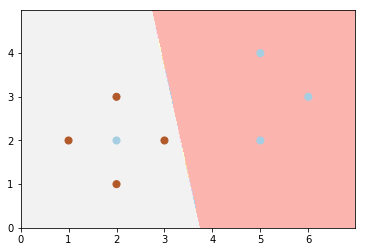

In [10]:
model = LinearRegression()
w0, wi, predictions, classificationPrediction, trainError = PerformModel(model, unsep_X, unsep_y)
print w0
print wi
print predictions
print classificationPrediction
print trainError

mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x : model.predict(x) >= 0.5)
#DrawFunctionOnInterval(JoinCoef(w0, wi), [3,3.5])

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [11]:
from sklearn.datasets import make_classification

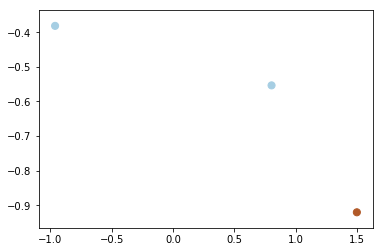

In [12]:
X2, y2 = make_classification(n_samples=3, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1)
#y2 is either 0,1,2
mlutils.plot_2d_clf_problem(X2, y2, h=None)

In [13]:
def DataSieve(array, sieveHole):
    """sieveHole is 0, 1 or 2"""
    newArray = []
    for y in array:
        if y == sieveHole:
            newArray.append(1)
        else:
            newArray.append(0)
    return newArray

def MetaModel(x):
    x = x.reshape(1, -1)
    return np.argmax([models[0].predict(x), models[1].predict(x), models[2].predict(x)])

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

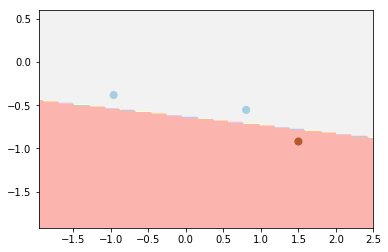

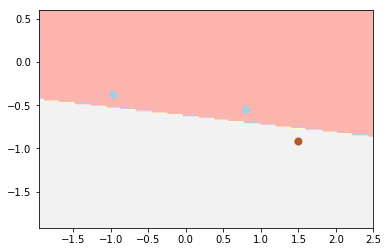

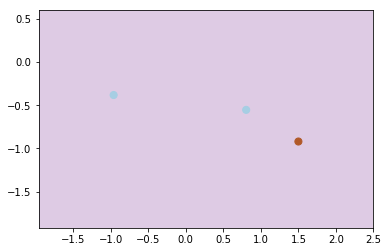

In [14]:
models = []
for classNumber in range(3):
    model = LinearRegression()
    ySieved = DataSieve(y2, classNumber)
    
    PerformModel(model, X2, ySieved)
    models.append(model)
    
    mlutils.plot_2d_clf_problem(X2, y2, h=lambda x : model.predict(x) >= 0.5)
    plt.show()

In [15]:
"""for classNumber in range(3):
    model = RidgeClassifier(alpha=0)
    ySieved = DataSieve(y2, classNumber)
    
    PerformModel(model, X2, ySieved)

    mlutils.plot_2d_clf_problem(X2, y2, h=model.predict)
    plt.show()"""

'for classNumber in range(3):\n    model = RidgeClassifier(alpha=0)\n    ySieved = DataSieve(y2, classNumber)\n    \n    PerformModel(model, X2, ySieved)\n\n    mlutils.plot_2d_clf_problem(X2, y2, h=model.predict)\n    plt.show()'

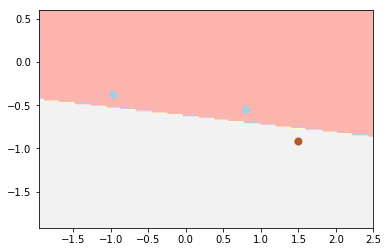

In [16]:
mlutils.plot_2d_clf_problem(X2, y2, h=MetaModel)

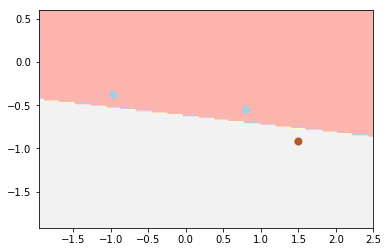

In [17]:
model = RidgeClassifier(alpha=0)
    
PerformModel(model, X2, y2)

mlutils.plot_2d_clf_problem(X2, y2, h=model.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [18]:
def sigm(x, alpha):
    return (1. / (1 + (math.e**((-1)*alpha*x))))
#alpha = wT*x + w0

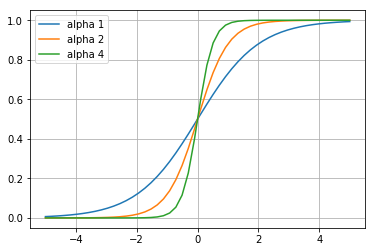

In [19]:
alphas = [1, 2, 4]
XDraw = sp.linspace(-5, 5)

for alpha in alphas:
    yDraw = []
    for x in XDraw:
        yDraw.append(sigm(x, alpha))
    plt.plot(XDraw, yDraw)
    
plt.legend(["alpha 1", "alpha 2", "alpha 4"])
plt.grid()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [20]:
from sklearn.metrics import log_loss

In [21]:
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    
    w0 = 0
    features = len(X[0])
    wi = []
    gradientWi = []
    for i in range(features):
        wi.append(0)
        gradientWi.append(0)
    wi = np.array(wi)
    gradientWi = np.array(gradientWi)
    
    gradientW0 = 0
    wHistory = []
    
    previousError = 0
    
    for i in range(max_iter):    
        error = cross_entropy_error(X, y, w0, wi)
        
        if abs(error-previousError) < epsilon:
            print "Valley floor has been reached"
            break
        previousError = error
        
        predictions = lr_h(X, w0, wi)
        classificationError = predictions - y

        gradientWi = np.dot(classificationError, X)
        gradientW0 = np.sum(classificationError)
        
        wi = wi * (1 - eta * alpha) - eta * gradientWi
        w0 = w0 - eta * gradientW0
        
        wHistory.append([w0, wi])
    
    if trace:
        return w0, wi, wHistory
    else:
        return w0, wi

def lr_h(X, w0, wi):
    predictionsReal = np.dot(X, wi) + w0
    return sigm(predictionsReal, alpha=1)

def cross_entropy_error(X, y, w0, wi):
    predictions = lr_h(X, w0, wi)
    return log_loss(y, predictions) # -(yt log(yp) + (1 - yt) log(1 - yp))

def predict(X, w0, wi):
    predictions = lr_h(X, w0, wi)
    return map(lambda x: 0 if x < 0.5 else 1, predictions)

In [22]:
def lr_train_mod(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    
    w0 = 0
    wi = np.array([0 for i in range(len(X[0]))])
    wHistory = []
    
    previousError = 0
    for i in range(max_iter):
        error = cross_entropy_error(X, y, w0, wi)
        
        if abs(error-previousError) < epsilon:
            print "Valley floor has been reached"
            break
        previousError = error
        
        gradientW0 = 0
        gradientWi = np.array([0 for i in range(len(X[0]))])
        
        for i in range(len(X)):
            prediction = lr_h(X[i], w0, wi)
            classificationError = prediction - y[i]
            
            gradientWi = gradientWi + classificationError * X[i]
            gradientW0 += np.sum(classificationError)

        w0 = w0 - eta * gradientW0
        wi = wi * (1 - eta * alpha) - eta * gradientWi

        wHistory.append([w0, wi])
        
    if trace:
        return w0, wi, wHistory
    else:
        return w0, wi

In [ ]:
w0, wi = lr_train_mod(np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]]), np.array([1, 1, 1, 1, 0, 0, 0]))

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Valley floor has been reached
4.45449454204
[-1.71089242  0.68413507]
[ 0.84772198  0.95627456  0.9838868   0.66598638  0.06112867  0.20368385
  0.02278833]
[1 1 1 1 0 0 0]
0.135218727202


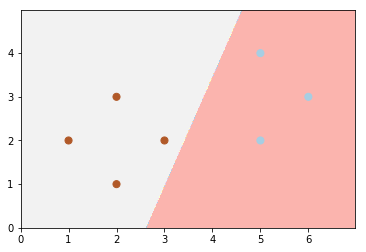

In [23]:
w0, wi = lr_train(seven_X, seven_y)

print w0
print wi
print lr_h(seven_X, w0, wi)
print seven_y
print cross_entropy_error(seven_X, seven_y, w0, wi)
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x : 0 if lr_h(x, w0, wi) <= 0.5 else 1)

Valley floor has been reached
4.45449454204
[-1.71089242  0.68413507]
[ 0.84772198  0.95627456  0.9838868   0.66598638  0.06112867  0.20368385
  0.02278833]
[1 1 1 1 0 0 0]
0.135218727202


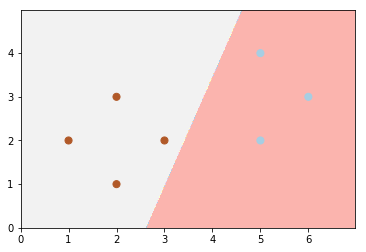

In [24]:
w0, wi = lr_train_mod(seven_X, seven_y)

print w0
print wi
print lr_h(seven_X, w0, wi)
print seven_y
print cross_entropy_error(seven_X, seven_y, w0, wi)
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x : 0 if lr_h(x, w0, wi) <= 0.5 else 1)

#### (c)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [25]:
from sklearn.metrics import zero_one_loss

Valley floor has been reached
Valley floor has been reached
Valley floor has been reached
Valley floor has been reached


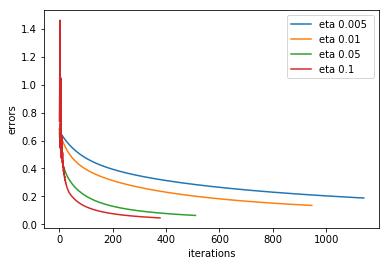

Valley floor has been reached
Valley floor has been reached
Valley floor has been reached
Valley floor has been reached


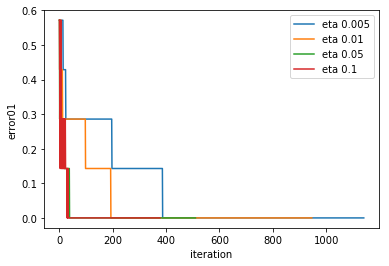

In [26]:
etas = [0.005, 0.01, 0.05, 0.1]#, 0.25, 0.5, 1.0]
for eta in etas:
    w0, wi, wHistory = lr_train_mod(seven_X, seven_y, eta=eta, trace=True)
    
    errors = []
    for ws in wHistory:
        w0 = ws[0]
        wi = ws[1]
        error = cross_entropy_error(seven_X, seven_y, w0, wi)
        errors.append(error)  
        
    plt.plot(range(len(wHistory)), errors)

plt.xlabel('iterations')
plt.ylabel('errors')
plt.legend(['eta 0.005 ', 'eta 0.01', 'eta 0.05', 'eta 0.1'])#, 'eta 0.25', 'eta 0.5', 'eta 1.0'])
plt.show()

for eta in etas:
    w0, wi, wHistory = lr_train_mod(seven_X, seven_y, eta=eta, trace=True)
    
    zeroOnes = []
    for ws in wHistory:
        w0 = ws[0]
        wi = ws[1]
        
        predictions = predict(seven_X, w0, wi)
        zeroOne = zero_one_loss(seven_y, predictions)
        zeroOnes.append(zeroOne)
        
        
    plt.plot(range(len(wHistory)), zeroOnes)

plt.xlabel('iteration')
plt.ylabel('error01')
plt.legend(['eta 0.005', 'eta 0.01', 'eta 0.05', 'eta 0.1'])#, 'eta 0.25', 'eta 0.5', 'eta 1.0'])
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [27]:
from sklearn.linear_model import LogisticRegression

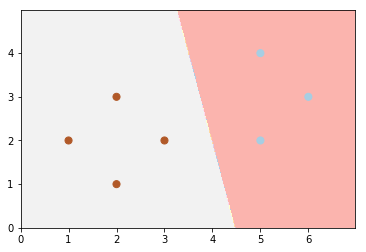

In [28]:
model = LogisticRegression(solver="sag", max_iter=2000)
w0, wi, predictions, classificationPrediction, trainError = PerformModel(model, seven_X, seven_y)

mlutils.plot_2d_clf_problem(seven_X, seven_y, h=model.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

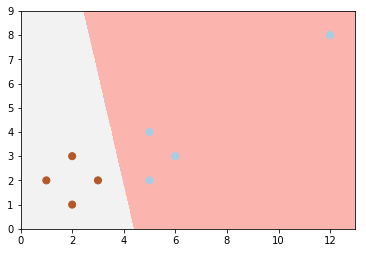

In [29]:
model = LogisticRegression(solver="sag", max_iter=2000)
w0, wi, predictions, classificationPrediction, trainError = PerformModel(model, outlier_X, outlier_y)

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=model.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


Valley floor has been reached


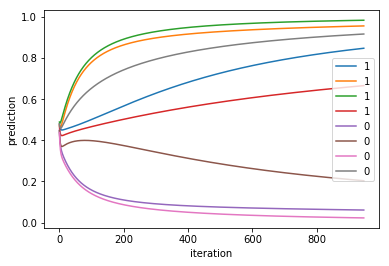

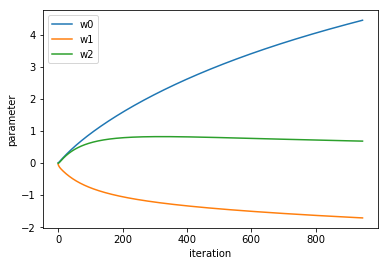

In [30]:
w0, wi, wHistory = lr_train(seven_X, seven_y, trace=True)

allPredictions = []
w012 = []
for ws in wHistory:
    w0 = ws[0]
    w1 = ws[1][0]
    w2 = ws[1][1]
    wi = ws[1]

    predictions = lr_h(unsep_X, w0, wi)
    allPredictions.append(predictions)  
    
    w012.append([w0, w1, w2])

plt.plot(range(len(wHistory)), allPredictions)
     
plt.xlabel('iteration')
plt.ylabel('prediction')
plt.legend(['1', '1', '1', '1', '0', '0', '0', '0'])
plt.show()

plt.plot(range(len(wHistory)), w012)

plt.xlabel('iteration')
plt.ylabel('parameter')
plt.legend(['w0', 'w1', 'w2'])
plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

Valley floor has been reached


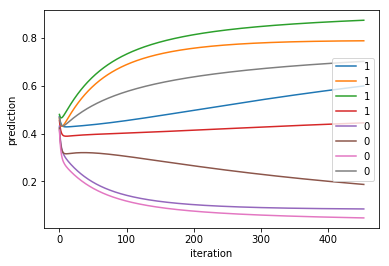

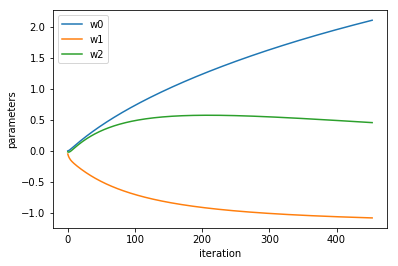

In [31]:
w0, wi, wHistory = lr_train(unsep_X, unsep_y, trace=True)

allPredictions = []
w012 = []
for ws in wHistory:
    w0 = ws[0]
    w1 = ws[1][0]
    w2 = ws[1][1]
    wi = ws[1]

    predictions = lr_h(unsep_X, w0, wi)
    allPredictions.append(predictions)  
    
    w012.append([w0, w1, w2])

plt.plot(range(len(wHistory)), allPredictions)
     
plt.xlabel('iteration')
plt.ylabel('prediction')
plt.legend(['1', '1', '1', '1', '0', '0', '0', '0'])
plt.show()

plt.plot(range(len(wHistory)), w012)

plt.xlabel('iteration')
plt.ylabel('parameters')
plt.legend(['w0', 'w1', 'w2'])
plt.show()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [32]:
from numpy.linalg import norm

Valley floor has been reached
Valley floor has been reached
Valley floor has been reached
Valley floor has been reached


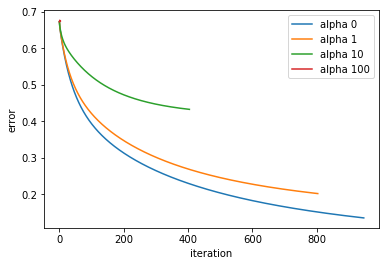

Valley floor has been reached
Valley floor has been reached
Valley floor has been reached
Valley floor has been reached


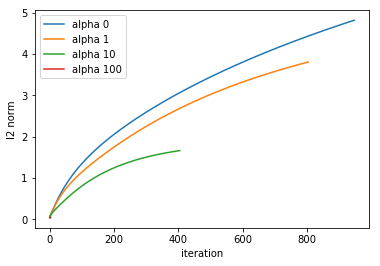

In [33]:
alphas = [0, 1, 10, 100]
for alpha in alphas:
    w0, wi, wHistory = lr_train(seven_X, seven_y, alpha=alpha, trace=True)
    
    errors = []
    for ws in wHistory:
        w0 = ws[0]
        wi = ws[1]
        
        error = cross_entropy_error(seven_X, seven_y, w0, wi)
        errors.append(error)  

    plt.plot(range(len(wHistory)), errors)

plt.xlabel('iteration')
plt.ylabel('error')
plt.legend(['alpha 0', 'alpha 1', 'alpha 10', 'alpha 100'])
plt.show()

for alpha in alphas:
    w0, wi, wHistory = lr_train(seven_X, seven_y, alpha=alpha, trace=True)
    
    l2_norms = []
    for ws in wHistory:
        w0 = ws[0]
        w1 = ws[1][0]
        w2 = ws[1][1]
        
        w012 = np.array([w0, w1, w2])
        l2_norms.append(linalg.norm(w012, 2))

    plt.plot(range(len(wHistory)), l2_norms)

plt.xlabel('iteration')
plt.ylabel('l2 norm')
plt.legend(['alpha 0', 'alpha 1', 'alpha 10', 'alpha 100'])
plt.show()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [34]:
from sklearn.preprocessing import PolynomialFeatures

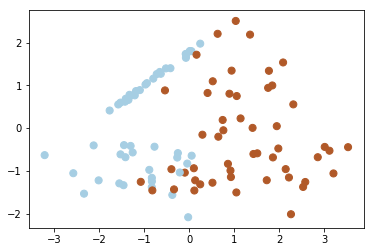

In [35]:
X6, y6 = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2)
#y6 is either 0,1
mlutils.plot_2d_clf_problem(X6, y6, h=None)

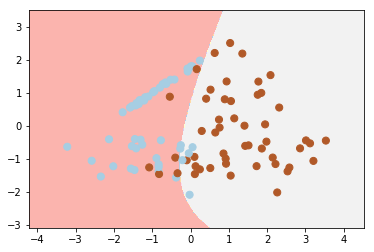

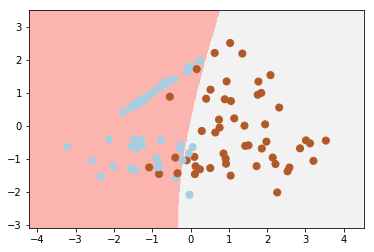

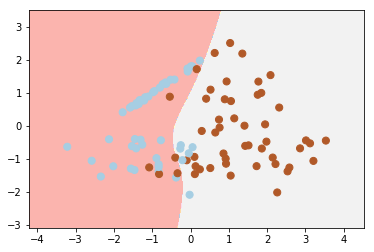

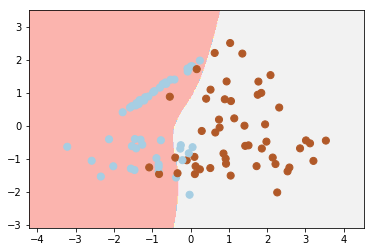

In [36]:
degrees = [2, 3]
Cs = [1, 0.1]

for degree in degrees:
    for C in Cs:
        features = PolynomialFeatures(degree)
        X6Poly = features.fit_transform(X6)

        model = LogisticRegression(solver="sag", max_iter=2000, C=C)

        model.fit(X6Poly, y6)
        mlutils.plot_2d_clf_problem(X6, y6, h= lambda x: model.predict(features.transform(x)))
        plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?